In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random 
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import keras
from keras.utils import np_utils
from keras.models import Model, Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from sklearn.metrics import confusion_matrix, f1_score
from keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import pickle

np.random.seed(123)

Using TensorFlow backend.


In [2]:
import sys

import tensorflow.keras
import sklearn as sk

print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

Tensor Flow Version: 2.1.0
Keras Version: 2.2.4-tf

Python 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
Pandas 1.2.1
Scikit-Learn 0.24.1
GPU is available


In [3]:
train_dir = 'dataset/handwritten_character/Train'
val_dir = 'dataset/handwritten_character/Validation'

idg = ImageDataGenerator(rescale=1./255)

# get all the data in the directory train (834036 images), and reshape them
train_generator = idg.flow_from_directory(train_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 834036,
                                         class_mode ='binary')

# get all the data in the directory validation (22524 images), and reshape them
valid_generator = idg.flow_from_directory(val_dir, color_mode = 'grayscale',
                                         target_size=(32, 32),
                                         batch_size = 22524,
                                         class_mode ='binary')

# create the data sets
# train_images, train_labels = next(train_generator)
# val_images, val_labels = next(valid_generator)

Found 834036 images belonging to 39 classes.
Found 22524 images belonging to 39 classes.


In [5]:
# Saving the train images/labels
save_path = "pickle_files/"

# with open(os.path.join(save_path, "train.pkl"), "wb") as f:
#     pickle.dump((train_images, train_labels), f)

In [59]:
# Saving the val images/labels

# with open(os.path.join(save_path, "val.pkl"), "wb") as f:
#     pickle.dump((val_images, val_labels), f)

In [6]:
# Load train images/labels
with open(os.path.join(save_path, "train.pkl"), "rb") as f:
    (train_images, train_labels) = pickle.load(f)

In [7]:
# Load train images/labels
with open(os.path.join(save_path, "val.pkl"), "rb") as f:
    (val_images, val_labels) = pickle.load(f)

In [8]:
train_generator.class_indices

{'#': 0,
 '$': 1,
 '&': 2,
 '0': 3,
 '1': 4,
 '2': 5,
 '3': 6,
 '4': 7,
 '5': 8,
 '6': 9,
 '7': 10,
 '8': 11,
 '9': 12,
 '@': 13,
 'A': 14,
 'B': 15,
 'C': 16,
 'D': 17,
 'E': 18,
 'F': 19,
 'G': 20,
 'H': 21,
 'I': 22,
 'J': 23,
 'K': 24,
 'L': 25,
 'M': 26,
 'N': 27,
 'P': 28,
 'Q': 29,
 'R': 30,
 'S': 31,
 'T': 32,
 'U': 33,
 'V': 34,
 'W': 35,
 'X': 36,
 'Y': 37,
 'Z': 38}

In [9]:
train_generator.classes

array([ 0,  0,  0, ..., 38, 38, 38])

In [10]:
#figure out how to save and load files using pickle

In [11]:
# Explore your dataset
print('Train images shape: ', train_images.shape)
print('Val images shape: ', val_images.shape)
print('Train labels shape: ', train_labels.shape)
print('Val labels shape: ', val_labels.shape)

Train images:  (834036, 32, 32, 1)
Val images:  (22524, 32, 32, 1)
Train labels:  (834036,)
Val labels:  (22524,)


In [12]:
train_images.shape

(834036, 32, 32, 1)

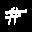

In [13]:
array_to_img(train_images[0])

In [14]:
train_labels

array([ 0., 11., 32., ...,  4., 15.,  5.], dtype=float32)

In [15]:
LB = LabelBinarizer()
train_labels = LB.fit_transform(train_labels)
val_labels = LB.fit_transform(val_labels)

In [16]:
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [17]:
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)

In [18]:
train_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
#plot more images her letters to visualize

In [20]:
# restnet = ResNet50(include_top=False, weights='imagenet')

In [29]:
# output = restnet.layers[-1].output
# output= keras.layers.Flatten()(output)

In [21]:
# restnet = Model(restnet.input, output=output)

In [26]:
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(32, (5, 5), strides=2, padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3,3), activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (5, 5), strides=2, padding='same', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.4))

model_2.add(Conv2D(128, kernel_size = 4, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(Flatten())
model_2.add(Dropout(0.4))
model_2.add(Dense(39, activation='softmax'))

In [27]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
batch_normalization_18 (Batc (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_6 (Dropout)          (None, 14, 14, 32)       

In [29]:
model_2.compile(loss = 'categorical_crossentropy',
             optimizer='adam',
             metrics = ['accuracy'])

In [30]:
np.random.seed(123)
results_2 = model_2.fit(train_images, train_labels, epochs=15, validation_data=(val_images, val_labels), batch_size=32, verbose=1)

Train on 834036 samples, validate on 22524 samples
Epoch 1/15
834036/834036 [==============================] - 382s 458us/step - loss: 0.2723 - accuracy: 0.9123 - val_loss: 0.1891 - val_accuracy: 0.9377
Epoch 2/15
834036/834036 [==============================] - 342s 410us/step - loss: 0.1800 - accuracy: 0.9394 - val_loss: 0.1679 - val_accuracy: 0.9501
Epoch 3/15
834036/834036 [==============================] - 346s 415us/step - loss: 0.1643 - accuracy: 0.9441 - val_loss: 0.1468 - val_accuracy: 0.9574
Epoch 4/15
834036/834036 [==============================] - 345s 414us/step - loss: 0.1552 - accuracy: 0.9471 - val_loss: 0.1397 - val_accuracy: 0.9562
Epoch 5/15
834036/834036 [==============================] - 341s 409us/step - loss: 0.1486 - accuracy: 0.9492 - val_loss: 0.1415 - val_accuracy: 0.9534
Epoch 6/15
834036/834036 [==============================] - 343s 411us/step - loss: 0.1439 - accuracy: 0.9508 - val_loss: 0.1245 - val_accuracy: 0.9606
Epoch 7/15
834036/834036 [===========

In [31]:
results_2.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [32]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_accuracy'])
    plt.plot(history['accuracy'])
    plt.legend(['val_accuracy', 'accuracy'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

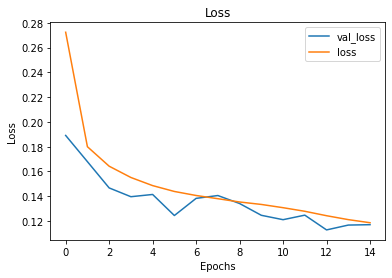

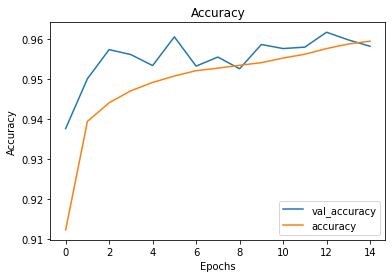

In [33]:
visualize_training_results(results_2)

In [35]:
# Save model

model_2.save('saved_models/CNN_model_2')

In [32]:
# Load model

model_2 = keras.models.load_model('saved_models/CNN_model_2')

In [29]:
# plot confusion matrix

In [36]:
def sort_contours(cnts, method='left-to-right'):
    reverse = False
    i = 0
    if method == 'right-to-left' or method == 'bottom-to-top':
        reverse = True
    if method == 'top-to-bottom' or method == 'botton-to-top':
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
       key = lambda b:b[1][i], reverse=reverse))
    return (cnts, boundingBoxes)

In [37]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 255), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model_2.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        ypred = [k for k, v in train_generator.class_indices.items() if v == ypred]
        [x] = ypred
        letters.append(x)
    return letters, image

In [36]:
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [37]:
# ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)

In [38]:
# dilated = cv2.dilate(thresh1, None, iterations=2)

In [39]:
# cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

In [40]:
# cnts = imutils.grab_contours(cnts)

In [41]:
# cnts = sort_contours(cnts, method="left-to-right")[0]

In [42]:
# for c in cnts:
#         if cv2.contourArea(c) > 10:
#             (x, y, w, h) = cv2.boundingRect(c)
#             cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

In [43]:
# roi = gray[y:y + h, x:x + w]

In [44]:
# thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [45]:
# thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)

In [46]:
# thresh = thresh.astype("float32") / 255.0

In [47]:
# thresh = np.expand_dims(thresh, axis=-1)

In [48]:
# thresh = thresh.reshape(1,32,32,1)

In [49]:
# ypred = model_1.predict(thresh)

In [50]:
# ypred = LB.inverse_transform(ypred)

In [51]:
# ypred

array([31.], dtype=float32)

In [38]:
def get_word(letter):
    word = "".join(letter)
    return word

EL75A


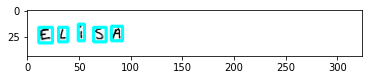

In [51]:
letter, image = get_letters("dataset/handwritting_names/train_v2/train/TRAIN_00037.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)